In [10]:
# Libraries
from sympy import*
import numpy as np

# To define automatic printing mode
init_printing()

# For priting with text
from IPython.display import display, Latex

# 1. IPT System Frequency Splitting Model

- Equations Derivation

In [13]:
# Definition of the symbolic variables

# Resistances --> Coils and Load
R_1, R_2, R_L = symbols('R_1, R_2, R_L',
                       real = True)

# Inductance and Capacitance
C_1, C_2, L_1, L_2, M_i = symbols('C_1, C_2, L_1,L_2, M_i', 
                                 real = True)

# Reactance
X_1, X_2 = symbols('X_1, X_2',
                       real = True)

# Angular frequency
w_e = symbols('w_e', real = True)

# Input Voltage and Current
V_1, I_1 = symbols('V_1, I_1', real = True)

In [30]:
# Reactance in each mesh
#X_1 = (w_e*L_1) - (1/(w_e*C_1))
#X_2 = (w_e*L_2) - (1/(w_e*C_2))

- Equivalent Circuit's Matrix Representation: $[Z][I] = [V]$

In [3]:
# Impedance Matriz [Z]
Z_m = Matrix([[R_1 + (I*X_1), I*w_e*M_i],
            [I*w_e*M_i, R_2 + R_L + (I*X_2)]])

# Voltage Vector
V_m = Matrix([[V_1], [0]])

In [4]:
# Solve the System of Equations
I_m = Z_m.inv()*V_m

In [21]:
# Input Current
result_I = "Input Current: \n $${} = {}$$".format(latex(I_1), 
                                                 latex(I_m[0]))
display(Latex(result_I))

# Separate Numerator and denominator of I1
I_1_n, I_1_d = fraction(I_m[0])

<IPython.core.display.Latex object>

In [25]:
# Operate separately each polynomial
display(factor(I_1_n))
display(factor(I_1_d + (I*(M_i**2)*(w_e**2))))

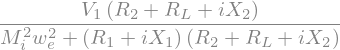

In [28]:
# Reconstruct the factored result
I_1 = (factor(I_1_n))/(factor(I_1_d + (I*(M_i**2)*(w_e**2))) 
                       - (I*(M_i**2)*(w_e**2)))
display(simplify(I_1))

- Input Impedance Expression $Z_{in}$:

# 2. $\pi$-Model and $T$-Model equivalent equations

- Equivalent capacitive model for 4 plates

## $\pi$-Model:

In [5]:
# Define the symbolic variables

# Capacitance
c_1, c_2, c_M = symbols('c_1 c_2 c_M', real = True)

# Angular frequency
w = symbols('w', real = True)

In [17]:
# Common denominator
com_D = (1/(w*I))*(1/c_1 + 1/c_2 + 1/c_M)

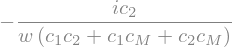

In [20]:
# T-model equivalent c'_1
Zp_1 = ((1/(w*I))**2)*((1/c_1)*(1/c_M))/com_D
simplify(Zp_1)

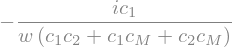

In [21]:
# T-model equivalent c'_2
Zp_2 = ((1/(w*I))**2)*((1/c_2)*(1/c_M))/com_D
simplify(Zp_2)

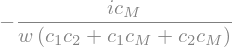

In [22]:
# T-model equivalent c'_M
Zp_M = ((1/(w*I))**2)*((1/c_1)*(1/c_2))/com_D
simplify(Zp_M)

## $T$-Model:

In [23]:
# Define the symbolic variables

# Capacitance
cp_1, cp_2, cp_M = symbols('cp_1 cp_2 cp_M', real = True)

In [24]:
# Common numerator
com_N = ((1/(w*I))**2)*((1/(cp_1*cp_M)) + (1/(cp_1*cp_2)) + (1/(cp_M*cp_2)))

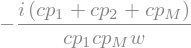

In [25]:
# Pi-model equivalent c_1
Z_1 = (com_N)/(1/(w*cp_2*I))
simplify(Z_1)

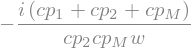

In [26]:
# Pi-model equivalent c_2
Z_2 = (com_N)/(1/(w*cp_1*I))
simplify(Z_2)

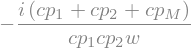

In [27]:
# Pi-model equivalent c_M
Z_M = (com_N)/(1/(w*cp_M*I))
simplify(Z_M)